<a href="https://colab.research.google.com/github/mahendrasaikumargandham/Deep-Learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classification with the MNIST Dataset**

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train.dtype

dtype('uint8')

In [5]:
x_train.min(), x_train.max()

(0, 255)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

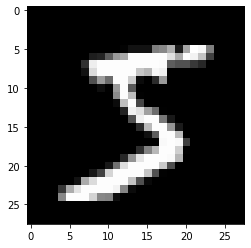

In [7]:
import matplotlib.pyplot as plt 
image = x_train[0]
plt.imshow(image, cmap = "gray")
plt.show()

In [8]:
y_train[0]

5

In [11]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [12]:
x_train.shape

(60000, 784)

In [13]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [14]:
x_train = x_train / 255
x_test = x_test / 255

In [15]:
x_train.dtype

dtype('float64')

In [16]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [17]:
import tensorflow.keras as keras
num_categories = 10
y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

In [18]:
x_train[0:9]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [21]:
from tensorflow.keras.layers import Dense

In [22]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

In [23]:
model.add(Dense(units = 512, activation='relu'))

In [25]:
model.add(Dense(units = 10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1880 - accuracy: 0.9448 - val_loss: 0.1019 - val_accuracy: 0.9697
Epoch 2/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.1009 - accuracy: 0.9737 - val_loss: 0.1305 - val_accuracy: 0.9732
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0804 - accuracy: 0.9806 - val_loss: 0.1275 - val_accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0713 - accuracy: 0.9836 - val_loss: 0.1453 - val_accuracy: 0.9684
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0594 - accuracy: 0.9868 - val_loss: 0.1566 - val_accuracy: 0.9779
